In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [391]:
data=pd.read_csv(r"E:\data analysis projects\3. Police Data.csv")

In [392]:
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


#                                      DATA CLEANING AND MANAGING OUTLIERS
                                         
                                         
                                        
                                        

In [393]:
data.isnull() 

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
65531,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
65532,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
65533,False,False,True,True,True,True,True,True,True,False,True,True,True,True,False


In [394]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

country_name column has all the null values . Dropping that column will be a good idea.

In [395]:
data.drop(columns="country_name") # dropping the country_name column


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [396]:
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [397]:
# country_name has not been removed.
# we have to use inplace=True
# similarly we will drop the columns stop date, stop time, driver_age_raw,driver_race,violation_raw,search_type
# all the columns have been removed because they won't affect our analysis

data.drop(columns="country_name",inplace=True)
data.drop(columns="stop_date",inplace=True)
data.drop(columns="stop_time",inplace=True)
data.drop(columns="driver_age_raw",inplace=True)
data.drop(columns="driver_race",inplace=True)
data.drop(columns="violation_raw",inplace=True)
data.drop(columns="search_type",inplace=True)


In [398]:
data.describe()

,driver_age
count,61228.000000
mean,34.148984
std,12.760710
min,15.000000
25%,23.000000
50%,31.000000
75%,43.000000
max,88.000000


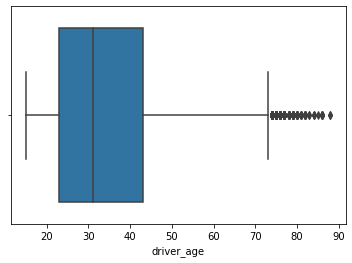

In [399]:
import seaborn as sns
sns.boxplot(x=data['driver_age'])   # scatter plot for knowing the outliers

In [400]:
# driver age has outliers, so we have to solve the issue of the outliers, also driver age has many null values.
# first we will replace all the null values in driver age by driver's age median.


In [401]:
data["driver_age"].fillna(data['driver_age'].median(), inplace = True)

In [402]:
data['driver_age'].isnull().sum()

0

In [403]:
# we are using z score for handling outliers



In [404]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['driver_age']))
print(z)

[1.1281037  0.49017373 0.07622337 ... 0.5617066  0.23805112 0.5617066 ]


In [405]:
data['zcore_of_drivers_age']=pd.DataFrame(z)

In [406]:
data

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,zcore_of_drivers_age
0,M,20.0,Speeding,False,Citation,False,0-15 Min,False,1.128104
1,M,40.0,Speeding,False,Citation,False,0-15 Min,False,0.490174
2,M,33.0,Speeding,False,Citation,False,0-15 Min,False,0.076223
3,M,19.0,Other,False,Arrest Driver,True,16-30 Min,False,1.209018
4,F,21.0,Speeding,False,Citation,False,0-15 Min,False,1.047190
...,...,...,...,...,...,...,...,...,...
65530,F,25.0,Speeding,False,Citation,False,0-15 Min,False,0.723534
65531,M,58.0,Speeding,False,Warning,False,0-15 Min,False,1.946623
65532,M,27.0,Equipment,False,Citation,False,0-15 Min,False,0.561707
65533,NaN,31.0,NaN,False,NaN,NaN,NaN,False,0.238051


In [407]:
# now before removing the outliers we have 65535 rows.... 

In [408]:
# removing thr outliers

In [409]:
data=data[(data.zcore_of_drivers_age>-3) &(data.zcore_of_drivers_age<3)]

In [410]:
data

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,zcore_of_drivers_age
0,M,20.0,Speeding,False,Citation,False,0-15 Min,False,1.128104
1,M,40.0,Speeding,False,Citation,False,0-15 Min,False,0.490174
2,M,33.0,Speeding,False,Citation,False,0-15 Min,False,0.076223
3,M,19.0,Other,False,Arrest Driver,True,16-30 Min,False,1.209018
4,F,21.0,Speeding,False,Citation,False,0-15 Min,False,1.047190
...,...,...,...,...,...,...,...,...,...
65530,F,25.0,Speeding,False,Citation,False,0-15 Min,False,0.723534
65531,M,58.0,Speeding,False,Warning,False,0-15 Min,False,1.946623
65532,M,27.0,Equipment,False,Citation,False,0-15 Min,False,0.561707
65533,NaN,31.0,NaN,False,NaN,NaN,NaN,False,0.238051


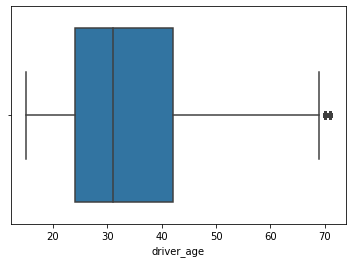

In [411]:
# drawing boxplot after removing the outliers, before removing the unnecessary outliers , we had 65535 rows, but now we have 65245 rows.
sns.boxplot(x=data['driver_age'])

# DISTRIBUTION OF TRAFFIC VIOLATIONS






In [389]:



data.violation.unique()  # for checking what were the violations that were done by people

array(['Speeding', 'Other', 'Equipment', 'Moving violation', nan,
       'Registration/plates', 'Seat belt'], dtype=object)

In [338]:
data['violation'].value_counts()

Speeding               37196
Moving violation       11923
Equipment               6516
Other                   3582
Registration/plates     2243
Seat belt                  3
Name: violation, dtype: int64

In [339]:
data_pie = pd.DataFrame([37204,11926,6516,3583,2243,3], index=['Speeding', 'Moving Violation', 'Equipment', 'Others','Registraion/plates','Seat belt'], columns=['x'])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002882F545220>],
      dtype=object)

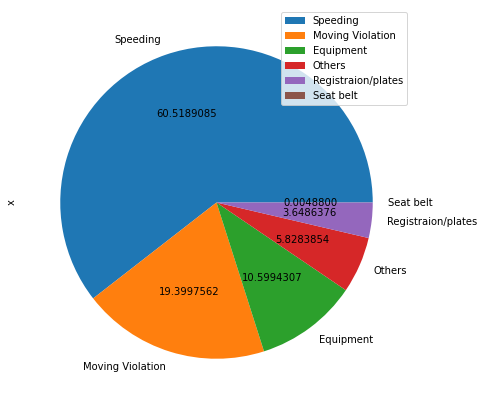

In [340]:
data_pie.plot(kind='pie',autopct='%.7f', figsize=(7, 8),subplots=True)

In [341]:
data

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,zcore_of_drivers_age
0,M,20.0,Speeding,False,Citation,False,0-15 Min,False,1.128104
1,M,40.0,Speeding,False,Citation,False,0-15 Min,False,0.490174
2,M,33.0,Speeding,False,Citation,False,0-15 Min,False,0.076223
3,M,19.0,Other,False,Arrest Driver,True,16-30 Min,False,1.209018
4,F,21.0,Speeding,False,Citation,False,0-15 Min,False,1.047190
...,...,...,...,...,...,...,...,...,...
65530,F,25.0,Speeding,False,Citation,False,0-15 Min,False,0.723534
65531,M,58.0,Speeding,False,Warning,False,0-15 Min,False,1.946623
65532,M,27.0,Equipment,False,Citation,False,0-15 Min,False,0.561707
65533,NaN,31.0,NaN,False,NaN,NaN,NaN,False,0.238051


In [309]:
data

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,zcore_of_drivers_age
0,M,20.0,Speeding,False,Citation,False,0-15 Min,False,1.128104
1,M,40.0,Speeding,False,Citation,False,0-15 Min,False,0.490174
2,M,33.0,Speeding,False,Citation,False,0-15 Min,False,0.076223
3,M,19.0,Other,False,Arrest Driver,True,16-30 Min,False,1.209018
4,F,21.0,Speeding,False,Citation,False,0-15 Min,False,1.047190
...,...,...,...,...,...,...,...,...,...
65530,F,25.0,Speeding,False,Citation,False,0-15 Min,False,0.723534
65531,M,58.0,Speeding,False,Warning,False,0-15 Min,False,1.946623
65532,M,27.0,Equipment,False,Citation,False,0-15 Min,False,0.561707
65533,NaN,31.0,NaN,False,NaN,NaN,NaN,False,0.238051


In [310]:
data['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2'], dtype=object)

In [311]:
data['drugs_related_stop'].isnull().sum()

0

In [312]:
data['stop_outcome'].unique()

array(['Citation', 'Arrest Driver', nan, 'N/D', 'Warning',
       'Arrest Passenger', 'No Action'], dtype=object)

In [313]:
data.shape

(65245, 9)

In [314]:
data[data['is_arrested']==True]

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,zcore_of_drivers_age
3,M,19.0,Other,False,Arrest Driver,True,16-30 Min,False,1.209018
22,M,50.0,Moving violation,False,Arrest Driver,True,30+ Min,False,1.299312
24,M,26.0,Moving violation,True,Arrest Driver,True,16-30 Min,False,0.642620
31,M,23.0,Speeding,False,Arrest Driver,True,16-30 Min,False,0.885362
40,M,17.0,Equipment,True,Arrest Driver,True,16-30 Min,True,1.370845
...,...,...,...,...,...,...,...,...,...
65316,M,29.0,Moving violation,False,Arrest Driver,True,0-15 Min,False,0.399879
65330,M,35.0,Moving violation,False,Arrest Driver,True,30+ Min,False,0.085604
65344,M,27.0,Moving violation,False,Arrest Driver,True,30+ Min,False,0.561707
65367,M,44.0,Moving violation,False,Arrest Driver,True,16-30 Min,False,0.813829


# GENDER BREAKDOWN OF THE ARRESTED 


In [416]:
data['is_arrested'].value_counts()


False    58930
True      2255
Name: is_arrested, dtype: int64

In [418]:
data.groupby(['driver_gender']).is_arrested.sum()



driver_gender
F     464
M    1791
Name: is_arrested, dtype: int64

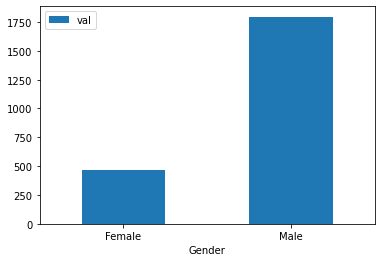

In [419]:
df = pd.DataFrame({'Gender':['Female', 'Male'], 'val':[464, 1796]})
ax = df.plot.bar(x='Gender', y='val', rot=0)

# DIGGING INTO THE DRUGS RELATED STOPS

In [421]:
data_drugs=data[data['drugs_related_stop']==True]

In [422]:
data_drugs

,driver_gender,driver_age,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,zcore_of_drivers_age
40,M,17.0,Equipment,True,Arrest Driver,True,16-30 Min,True,1.370845
41,M,17.0,Equipment,True,Citation,False,30+ Min,True,1.370845
118,M,49.0,Moving violation,True,Arrest Driver,True,30+ Min,True,1.218399
139,M,25.0,Equipment,True,Arrest Driver,True,16-30 Min,True,0.723534
219,M,19.0,Other,True,Arrest Passenger,True,16-30 Min,True,1.209018
...,...,...,...,...,...,...,...,...,...
64858,M,24.0,Speeding,True,Citation,False,16-30 Min,True,0.804448
65033,M,27.0,Speeding,True,Citation,False,16-30 Min,True,0.561707
65219,M,33.0,Equipment,True,Arrest Driver,True,30+ Min,True,0.076223
65408,F,26.0,Speeding,True,Citation,False,30+ Min,True,0.642620


In [429]:
data_drugs[data_drugs['is_arrested']==True]['driver_age'].median()

27.0

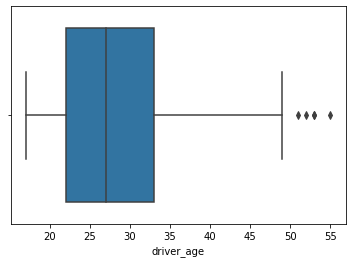

In [430]:
sns.boxplot(x=data_drugs[data_drugs['is_arrested']==True]['driver_age'])

In [431]:
data_drugs[data_drugs['is_arrested']==True]['driver_age'].describe()

count    167.000000
mean      29.035928
std        8.742565
min       17.000000
25%       22.000000
50%       27.000000
75%       33.000000
max       55.000000
Name: driver_age, dtype: float64

# DEMOGRAPHICS(Age focussed) OF PEOPLE FOUND IN TRAFFIC VIOLATIONS, ANALYSIS OF MAJORITY VIOLATIONS

In [450]:
#looking into unique violations
v=data['violation'].unique()
print(v)

['Speeding' 'Other' 'Equipment' 'Moving violation' nan
 'Registration/plates' 'Seat belt']


In [453]:
# looking into the violation of speeding

In [454]:
data[data['violation']==v[0]]['driver_age']

0        20.0
1        40.0
2        33.0
4        21.0
6        36.0
         ... 
65527    31.0
65529    18.0
65530    25.0
65531    58.0
65534    27.0
Name: driver_age, Length: 37044, dtype: float64

In [455]:
data[data['violation']==v[0]]['driver_age'].median()

30.0

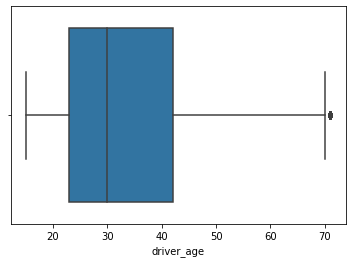

In [456]:
sns.boxplot(x=data[data['violation']==v[0]]['driver_age'])

In [457]:
data[data['violation']==v[0]]['driver_age'].describe()

count    37044.000000
mean        33.073075
std         12.309826
min         15.000000
25%         23.000000
50%         30.000000
75%         42.000000
max         71.000000
Name: driver_age, dtype: float64

In [458]:
# looking for violation of moving violations

In [459]:
data[data['violation']==v[3]]['driver_age']

21       52.0
22       50.0
24       26.0
30       46.0
33       52.0
         ... 
65504    30.0
65512    30.0
65513    20.0
65517    43.0
65518    18.0
Name: driver_age, Length: 11836, dtype: float64

In [460]:
data[data['violation']==v[3]]['driver_age'].median()

34.0

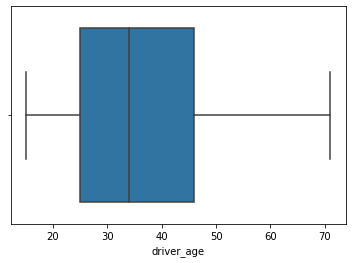

In [461]:
sns.boxplot(x=data[data['violation']==v[3]]['driver_age'])

In [462]:
data[data['violation']==v[3]]['driver_age'].describe()

count    11836.000000
mean        36.416779
std         12.839528
min         15.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         71.000000
Name: driver_age, dtype: float64